# Preparação dos Dados

### Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px

# plot parameters
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### Leitura dos Dados

In [3]:
df  = pd.read_csv("data/dados.csv")
df_prep = pd.read_csv("data/dados_prep.csv")


### Visualização Inicial

In [4]:
produtos_mais_vendidos = df.groupby('Product_Name')['Order_Quantity'].sum().reset_index()
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='Order_Quantity', ascending=False).head(10)

fig1 = go.Figure(go.Bar(
    x=produtos_mais_vendidos['Order_Quantity'],
    y=produtos_mais_vendidos['Product_Name'],
    orientation='h',
    text=produtos_mais_vendidos['Order_Quantity'],
    textposition='auto',
    insidetextfont=dict(family='Times', size=12)
))

fig1.update_layout(title='Top 10 Produtos Mais Vendidos', xaxis_title='Quantidade Vendida', yaxis_title='Produto')

fig1.show()

In [5]:
produtos_mais_lucrativos = df.groupby('Product_Name')['Profit'].sum().reset_index()
produtos_mais_lucrativos = produtos_mais_lucrativos.sort_values(by='Profit', ascending=False).head(10)

fig2 = go.Figure(go.Bar(
    x=produtos_mais_lucrativos['Profit'],
    y=produtos_mais_lucrativos['Product_Name'],
    orientation='h',
    text=produtos_mais_lucrativos['Profit'],
    textposition='auto',
    insidetextfont=dict(family='Times', size=12)
))

fig2.update_layout(title='Top 10 Produtos Mais Lucrativos', xaxis_title='Lucro', yaxis_title='Produto')

fig2.show()

In [9]:
df_clean = df_prep

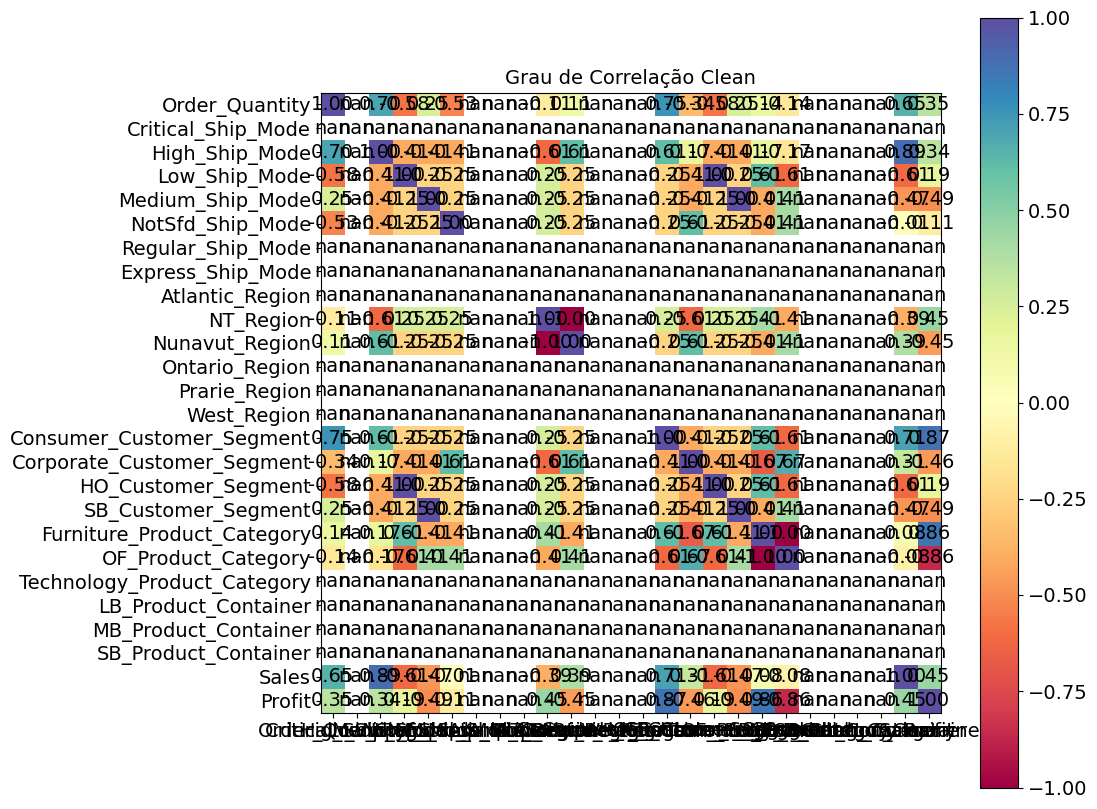

In [8]:
plt.imshow(df_clean.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(df_clean.corr().columns)), df_clean.corr().columns)
plt.yticks(range(len(df_clean.corr().columns)), df_clean.corr().columns)
labels = df_clean.corr().values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.2f}'.format(labels[b, a]), ha='center', va='center', color='black')
plt.title('Grau de Correlação Clean', fontsize=14)
plt.show()

In [10]:
df_clean = df_prep[['Sales', 'Profit', 'Critical_Ship_Mode', 'Regular_Ship_Mode', 
               'Express_Ship_Mode', 'Atlantic_Region',
       'NT_Region', 'Nunavut_Region', 'Ontario_Region', 'Prarie_Region',
               'LB_Product_Container', 'MB_Product_Container',
       'SB_Product_Container']]

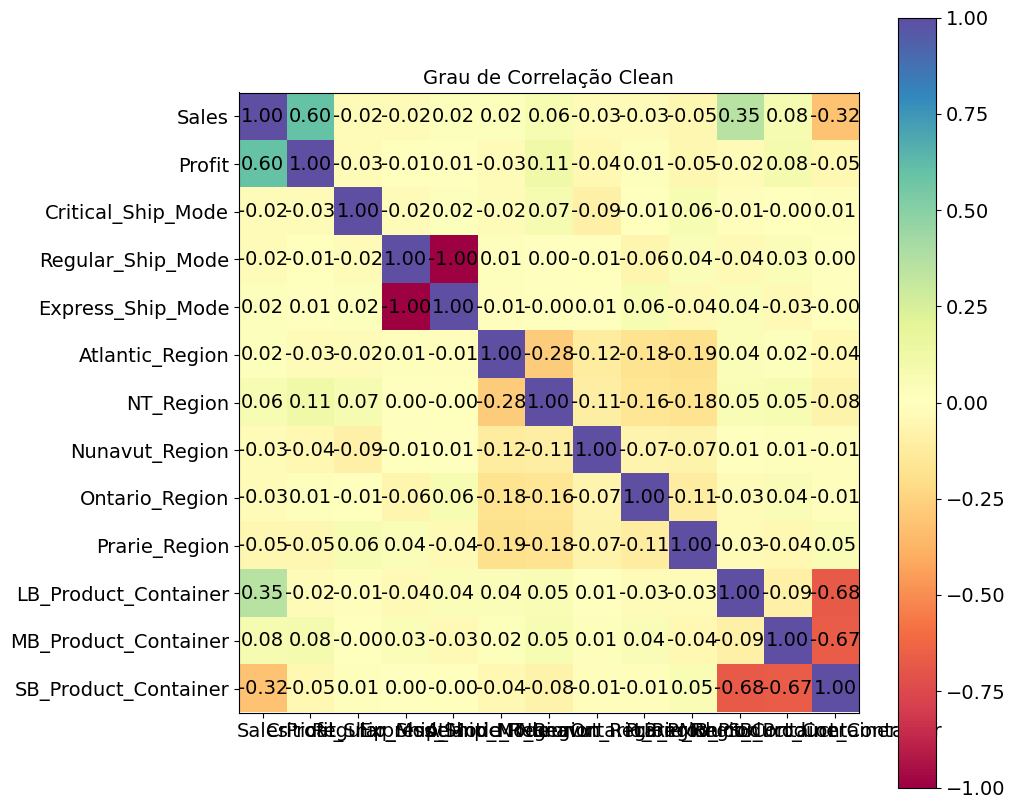

In [11]:
plt.imshow(df_clean.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(df_clean.corr().columns)), df_clean.corr().columns)
plt.yticks(range(len(df_clean.corr().columns)), df_clean.corr().columns)
labels = df_clean.corr().values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.2f}'.format(labels[b, a]), ha='center', va='center', color='black')
plt.title('Grau de Correlação Clean', fontsize=14)
plt.show()

In [12]:
grafico_classe_ldp = px.treemap(df, path = ['Order_Priority','Region'])
grafico_classe_ldp.show()

In [13]:
grafico_classe_ldp = px.treemap(df, path = ['Ship_Mode','Region','Order_Priority'])
grafico_classe_ldp.show()

In [14]:
fig = px.scatter(df, x="Sales", y="Region", color="Order_Quantity")
fig.show()